# -----------------------------------------
## Silvia's Brainery Bytes

#    OpenSees Material Demo

# -----------------------------------------
## R210525
###   developed by Silvia Mazzoni, 2021
###      silviamazzoni@yahoo.com
# -----------------------------------------


In [1]:
# ------------------
#  initialize
# ------------------
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://github.com/jupyter-widgets/ipywidgets/issues/1853
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
# %matplotlib notebook

import glob
import urllib
import webbrowser
from ipywidgets import widgets, Output
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from IPython.display import display
from IPython.display import clear_output
from IPython.display import HTML
from IPython.display import Image
from IPython.display import Javascript
from urllib.parse import urljoin
from urllib.request import pathname2url
from pathlib import Path
from datetime import date
import os
from os.path import expanduser
#http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
#https://stackoverflow.com/questions/22487231/how-to-start-a-batch-file-from-within-a-python-script-and-detach-from-it
import subprocess

#from ipysheet import sheet, cell, row, column, cell_range,from_dataframe,to_dataframe
pd.set_option("display.max_rows", None)
np.set_printoptions(threshold=np.inf)
plt.interactive(True)

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 100000;

<IPython.core.display.Javascript object>

In [3]:
OpenSeesMaterialDefaultValues = {}
OpenSeesMaterialDefaultValues['Bond_SP01']=[60.0,0.01,75.0,0.1,0.4,0.75]
OpenSeesMaterialDefaultValues['Cast']=[10.0,1.0,0.1,60.0,29000.0,1.0,0.05,18.0,0.925,0.15,0.0,1.0,0.0,1.0]
OpenSeesMaterialDefaultValues['Concrete01']=[-4.4,-0.002,-4.576,-0.04]
OpenSeesMaterialDefaultValues['Concrete02']=[-4.4,-0.002,-4.576,-0.04,0.1,0.572,286.0]
OpenSeesMaterialDefaultValues['Concrete04']=[-4.4,-0.002,-0.2,3700,0.5,0.001,0.1]
OpenSeesMaterialDefaultValues['Concrete06']=[-4.4,-0.002,2.0,1.0,0.32,0.44,0.0002,4.0,0.08]
OpenSeesMaterialDefaultValues['Concrete07']=[-4.4,-0.002,3700,0.44,0.0002,2.0,2.3,3.97]
OpenSeesMaterialDefaultValues['Elastic']=[29000.0,0.0,29000.0]
OpenSeesMaterialDefaultValues['ElasticPP']=[29000.0,0.0020689655,-0.0020689655,0.0]
OpenSeesMaterialDefaultValues['ElasticPPGap']=[29000.0,60.0,0.001,0.0]
OpenSeesMaterialDefaultValues['ENT']=[29000.0]
OpenSeesMaterialDefaultValues['Hysteretic']=[60.0,0.003,78.0,0.024,61.2,0.1,-60.0,-0.003,-78.0,-0.024,-61.2,-0.1,1.0,1.0,0.0,0.0,0.0]
OpenSeesMaterialDefaultValues['Bilin']=[29000.0,0.01,0.01,60.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.04,0.04,0.01,0.01,0.33,0.33,0.225349487,0.225349487,0.0,0.0,0.0]
OpenSeesMaterialDefaultValues['ModIMKPeakOriented']=[29000.0,0.01,0.01,60.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.04,0.04,0.01,0.01,0.33,0.33,0.225349487,0.225349487,0.0,0.0]
OpenSeesMaterialDefaultValues['ModIMKPinching']=[29000.0,0.01,0.01,60.0,-60.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.04,0.04,0.01,0.01,0.33,0.33,0.225349487,0.225349487,0.0,0.0]
OpenSeesMaterialDefaultValues['Pinching4']=[60.0,0.003,78.0,0.024,61.2,0.1,61.0,1.0,-60.0,-0.003,-78.0,-0.024,-61.2,-0.1,-61.0,-1.0,0.5,0.25,0.05,0.5,0.25,0.05,1.0,0.2,0.3,0.2,0.9,0.5,0.5,2.0,2.0,0.5,1.0,0.0,1.0,1.0,0.9,10.0,'energy']
OpenSeesMaterialDefaultValues['PySimple1']=[1,40.0,0.01,200.0,0.0]
OpenSeesMaterialDefaultValues['QzSimple1']=[1,40.0,0.01,0.0,0.0]
OpenSeesMaterialDefaultValues['ReinforcingSteel']=[60.0,66.0,29000.0,2900.0,0.008,0.02,'-GABuck',6,1,0.4,0.5,'-DMBuck',6,1,'-CMFatigue',0.26,0.506,0.389,'-IsoHard',4.3,0.01,'-MPCurveParams',0.33,18,4]
OpenSeesMaterialDefaultValues['SAWS']=[15.799848,0.545094768764215,1.04095,159.83706,0.1022018,-0.0324118361176701,1.0,0.0692552,0.8,1.1]
OpenSeesMaterialDefaultValues['SelfCentering']=[29000.0,2900.0,60.0,0.1,0,0,1]
OpenSeesMaterialDefaultValues['Steel01']=[60.0,29000.0,0.05,0.0,1.0,0.0,1.0]
OpenSeesMaterialDefaultValues['Steel02']=[60.0,29000.0,0.05,18.0,0.925,0.15,0.0,1.0,0.0,1.0,0.0]
OpenSeesMaterialDefaultValues['SteelMPF']=[60.0,40.0,29000.0,0.05,0.01,20.0,0.925,0.15,0.0,1.0,0.0,1.0]
OpenSeesMaterialDefaultValues['TzSimple1']=[1,40.0,0.01,0.0]
OpenSeesMaterialDefaultValues['UVCuniaxial']=[29000.0,60.0,122.63,19.74,143.49,248.14,2,31638.0,277.32,1548.6,9.04]
OpenSeesMaterialDefaultValues['ViscousDamper']=[29000.0,200.0,0.3,0.0,1,1e-6,1e-10,15.0]


In [4]:
def defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak*scaleFactor,-thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(-thisPeak*scaleFactor,0,nSteps))

    return strain     

Bond_SP01
[60.0, 0.01, 75.0, 0.1, 0.4, 0.75]


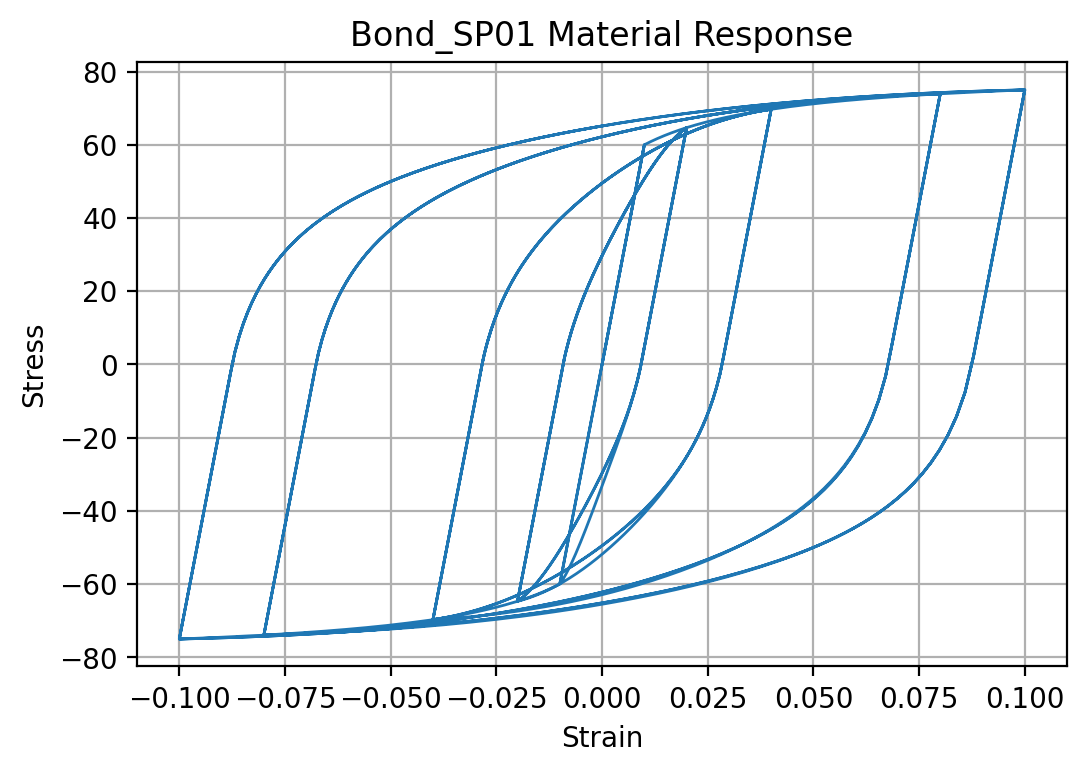

Cast
[10.0, 1.0, 0.1, 60.0, 29000.0, 1.0, 0.05, 18.0, 0.925, 0.15, 0.0, 1.0, 0.0, 1.0]


Cast Fuse uniaxial material - Written by Dimitrios G. Lignos, Ph.D.


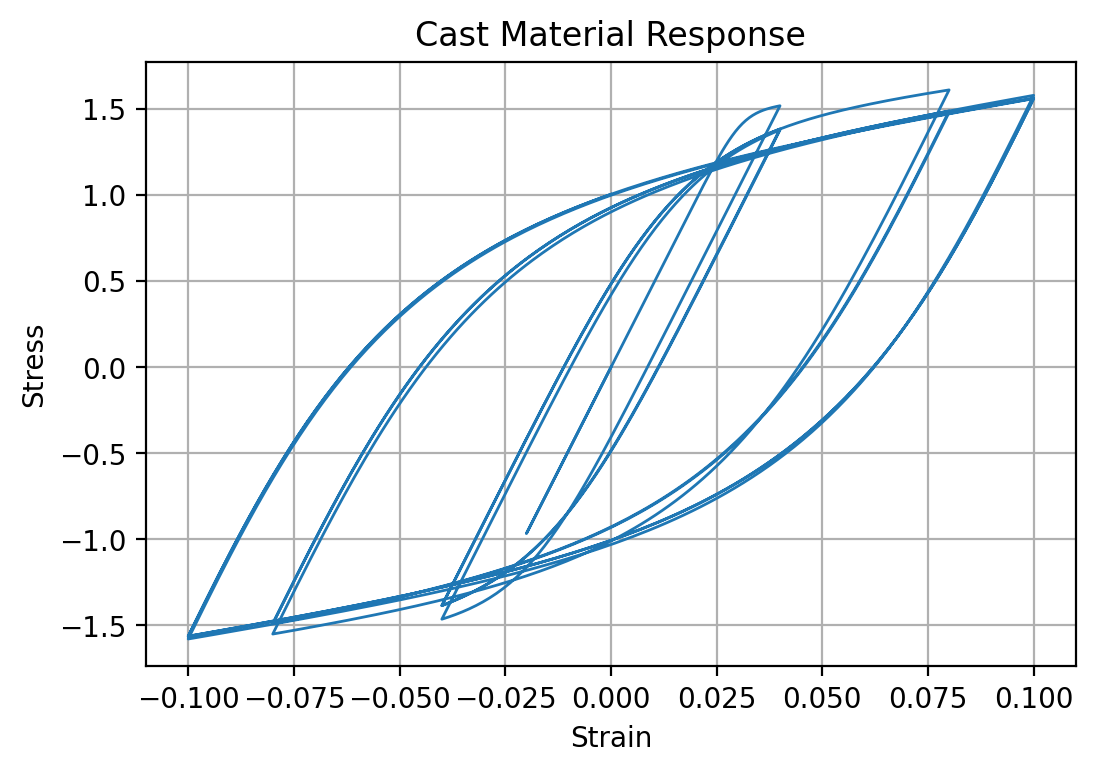

Concrete01
[-4.4, -0.002, -4.576, -0.04]


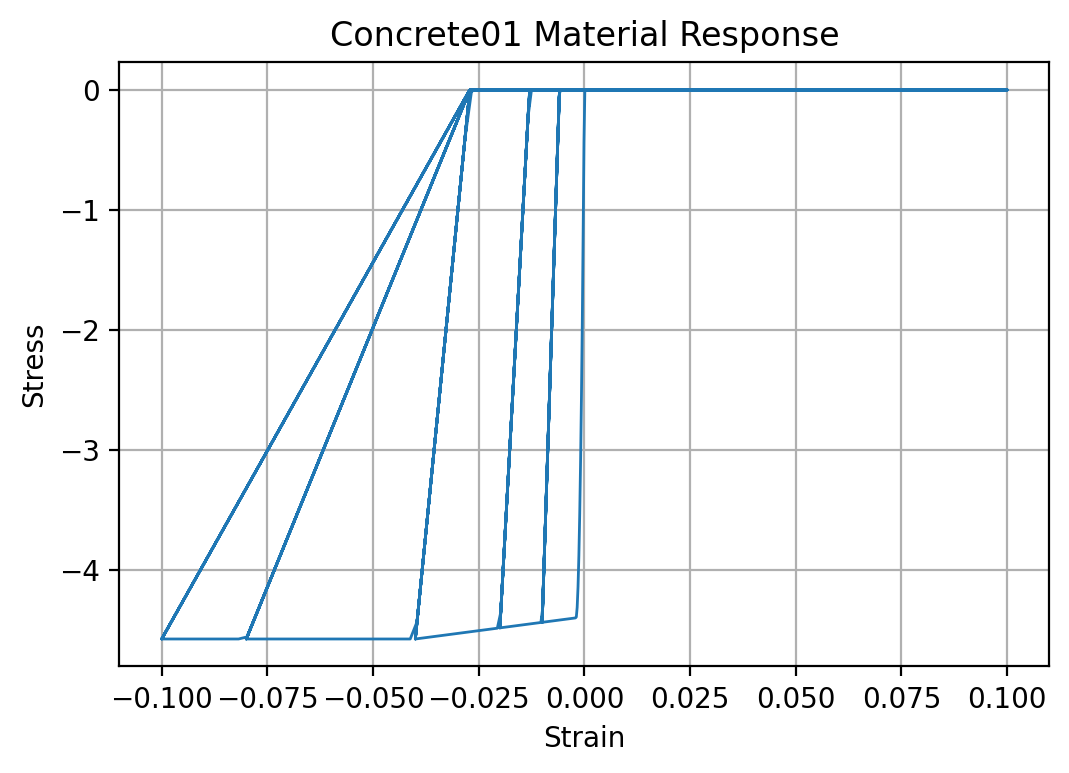

Concrete02
[-4.4, -0.002, -4.576, -0.04, 0.1, 0.572, 286.0]


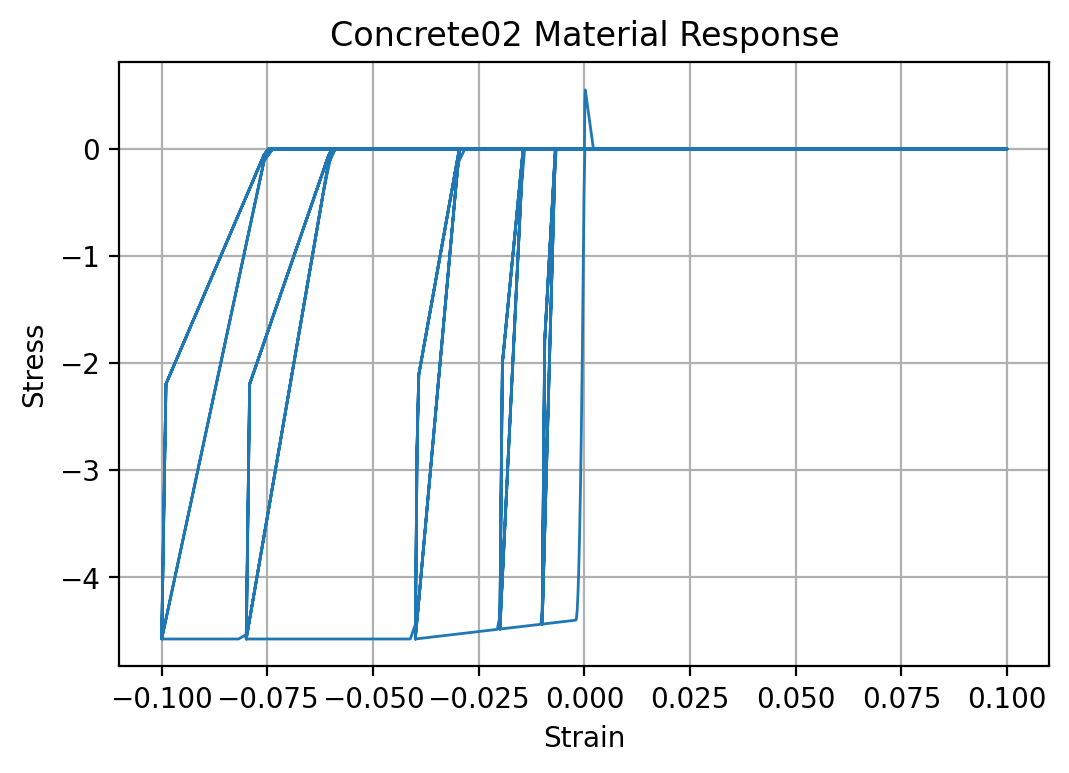

Concrete04
[-4.4, -0.002, -0.2, 3700, 0.5, 0.001, 0.1]


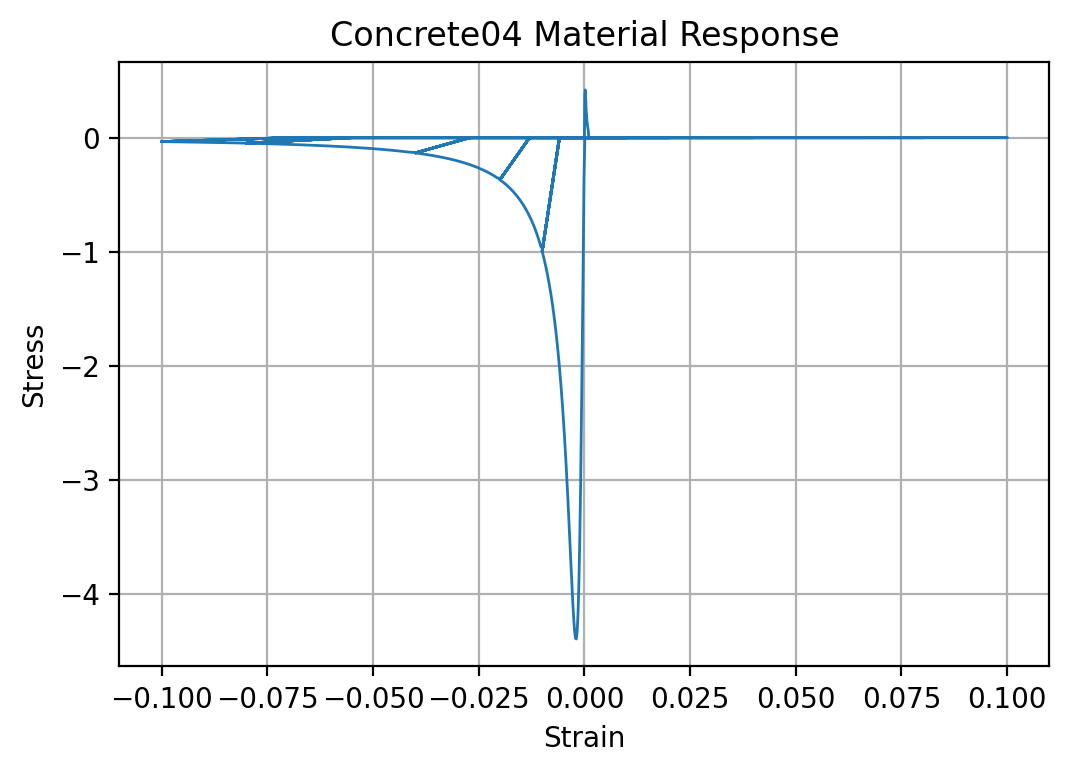

Concrete06
[-4.4, -0.002, 2.0, 1.0, 0.32, 0.44, 0.0002, 4.0, 0.08]


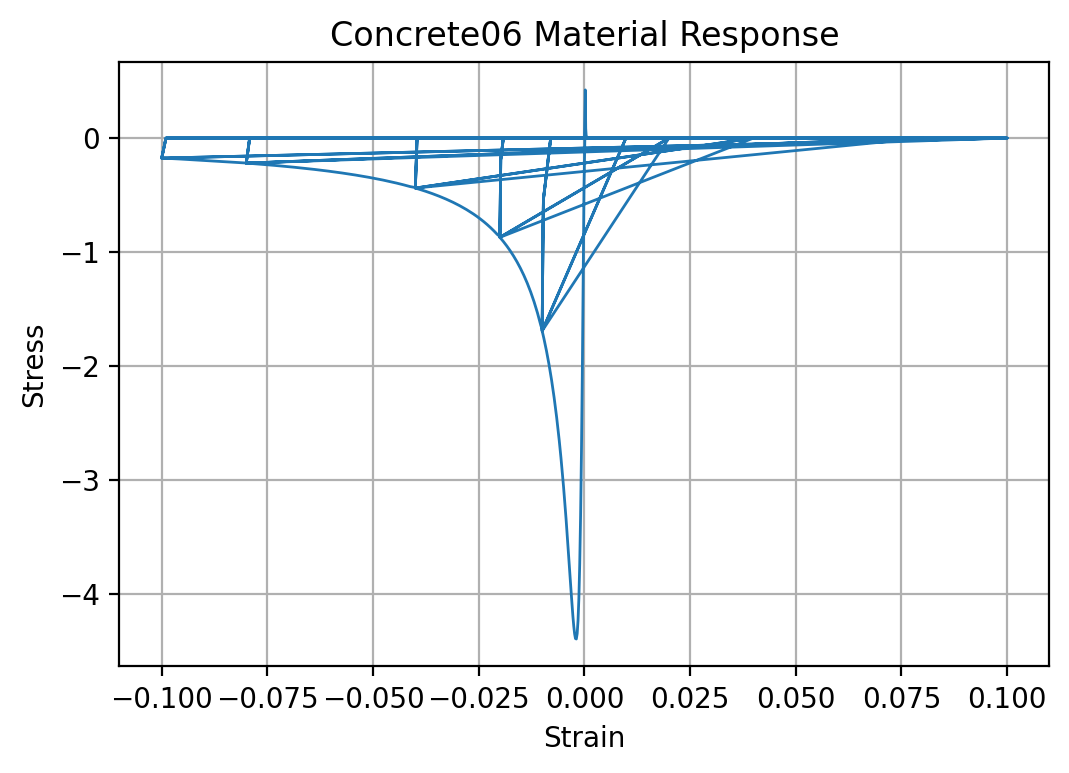

Concrete07
[-4.4, -0.002, 3700, 0.44, 0.0002, 2.0, 2.3, 3.97]


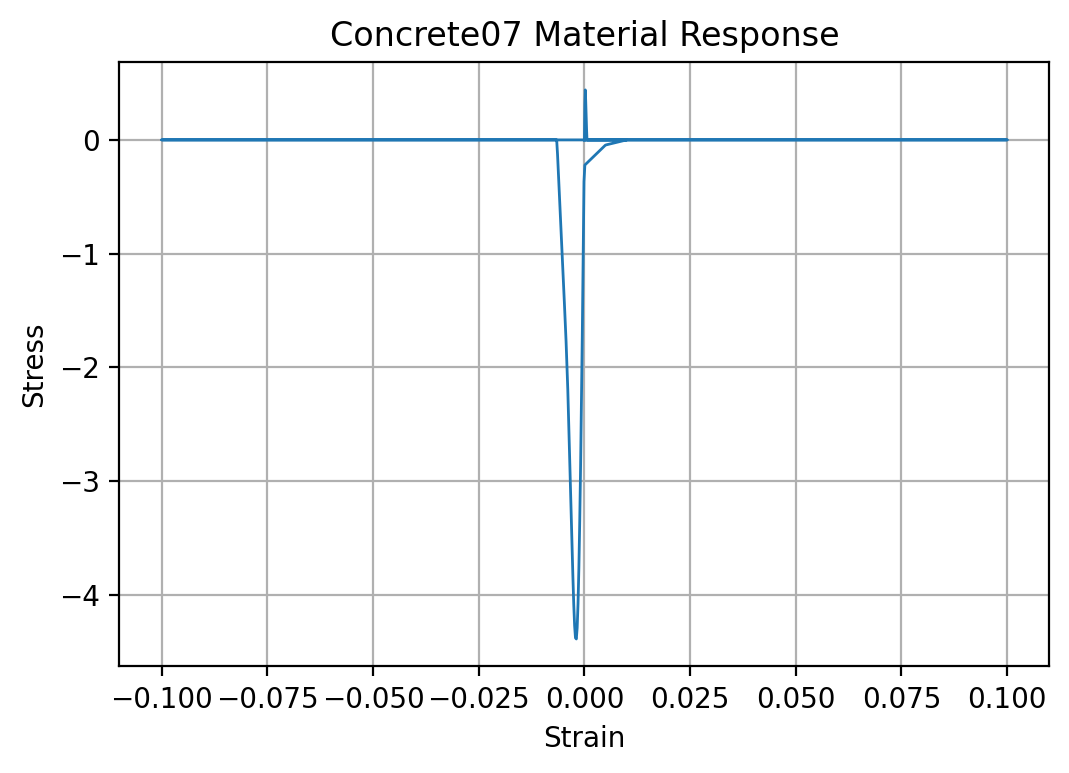

Elastic
[29000.0, 0.0, 29000.0]


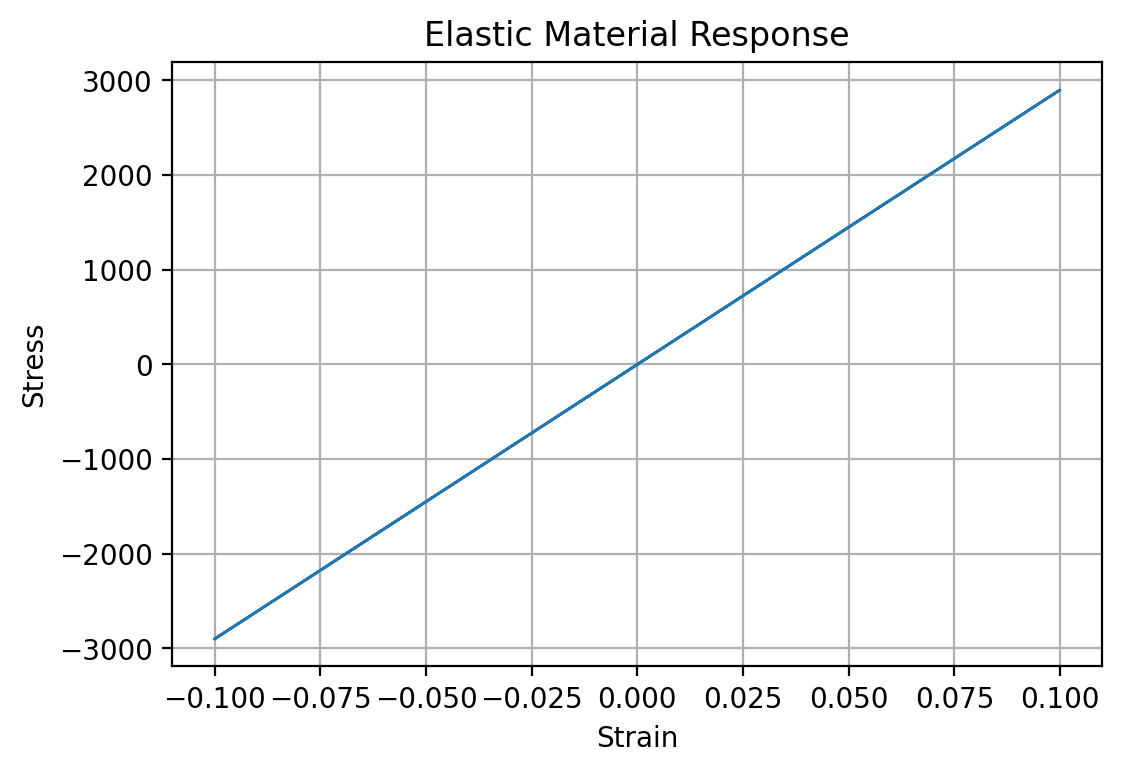

ElasticPP
[29000.0, 0.0020689655, -0.0020689655, 0.0]


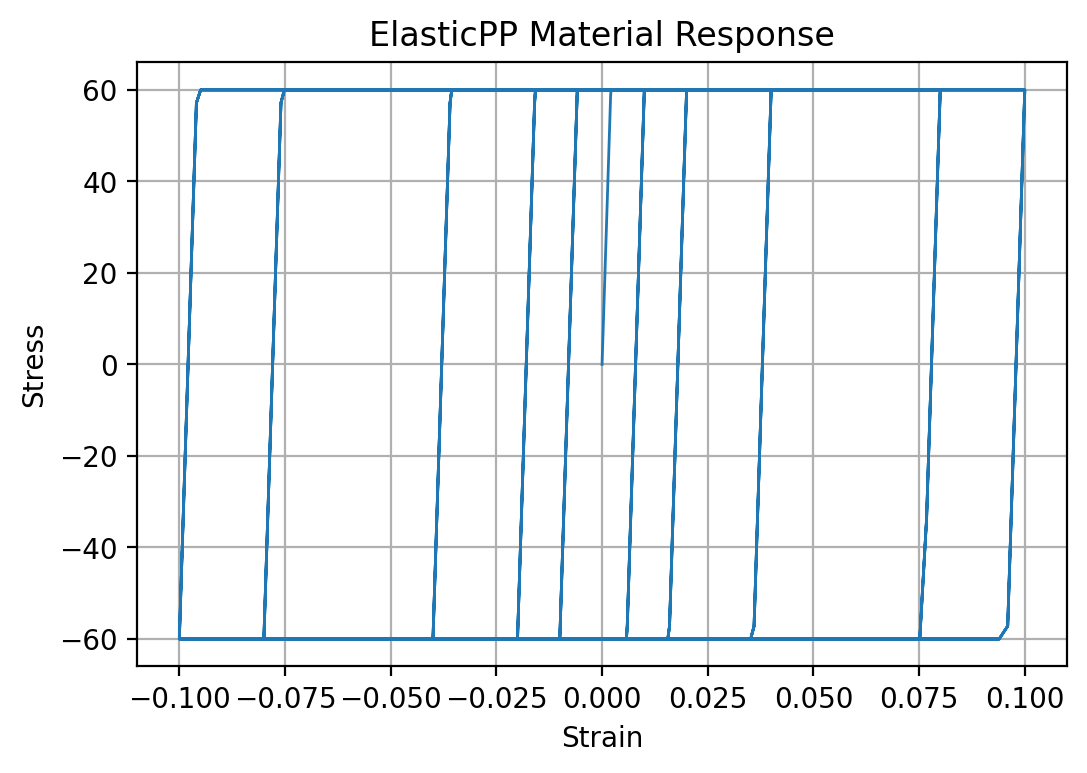

ElasticPPGap
[29000.0, 60.0, 0.001, 0.0]


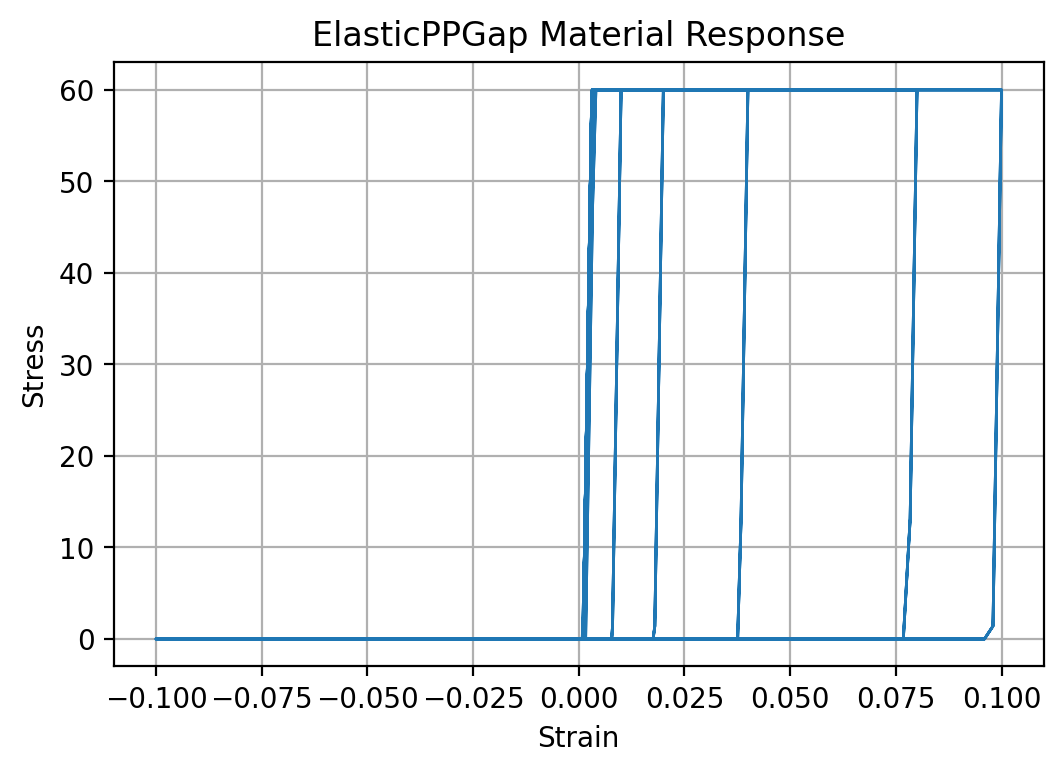

ENT
[29000.0]


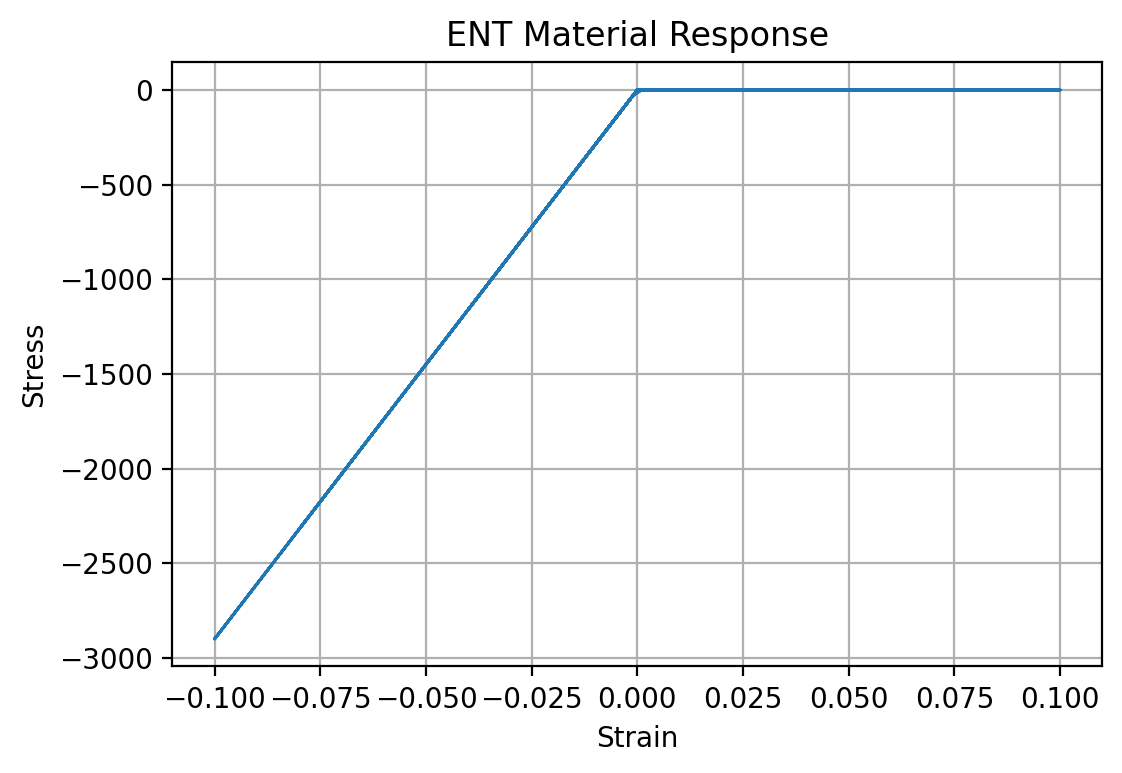

Hysteretic
[60.0, 0.003, 78.0, 0.024, 61.2, 0.1, -60.0, -0.003, -78.0, -0.024, -61.2, -0.1, 1.0, 1.0, 0.0, 0.0, 0.0]


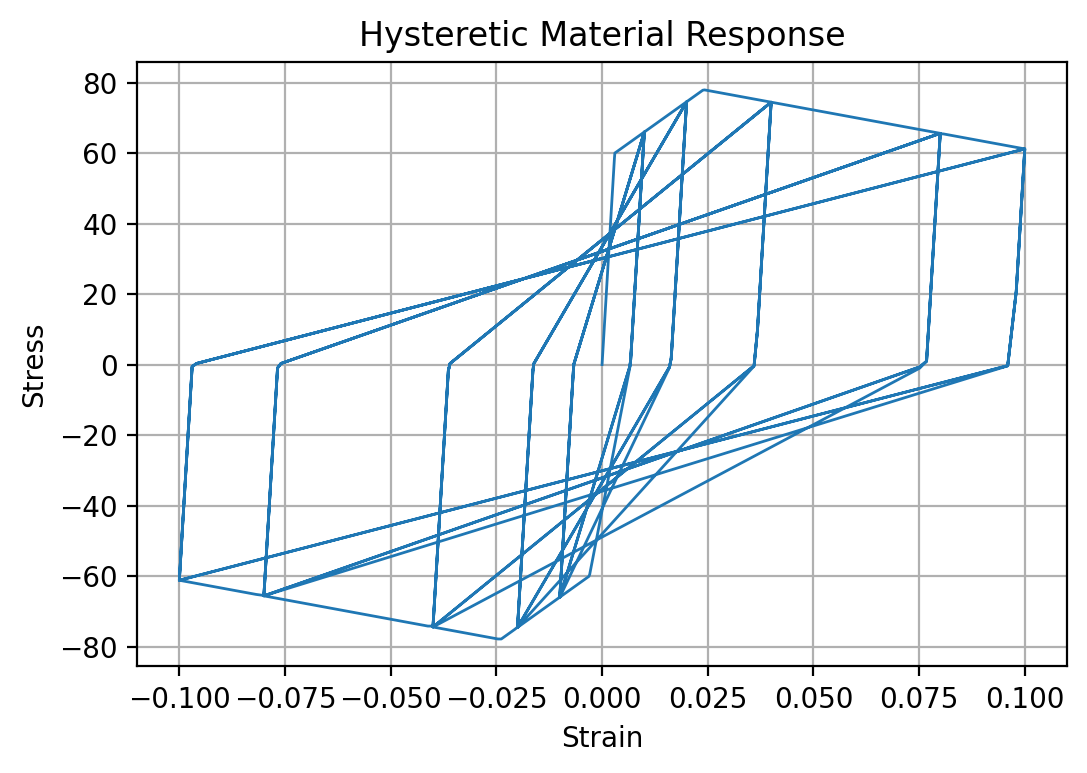

Bilin
[29000.0, 0.01, 0.01, 60.0, -60.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.04, 0.04, 0.01, 0.01, 0.33, 0.33, 0.225349487, 0.225349487, 0.0, 0.0, 0.0]


Modified Ibarra-Medina-Krawinkler Model with Bilinear Hysteretic Response


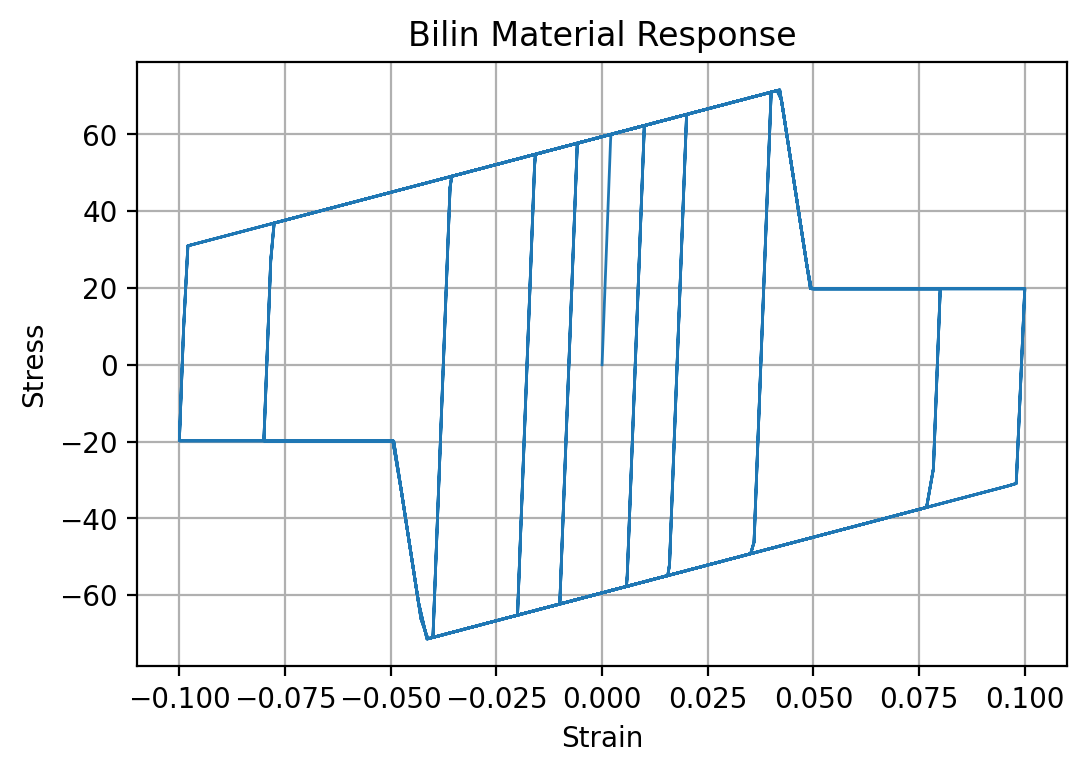

ModIMKPeakOriented
[29000.0, 0.01, 0.01, 60.0, -60.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.04, 0.04, 0.01, 0.01, 0.33, 0.33, 0.225349487, 0.225349487, 0.0, 0.0]


Modified Ibarra-Medina-Krawinkler Model with Peak-Oriented Hysteretic Response


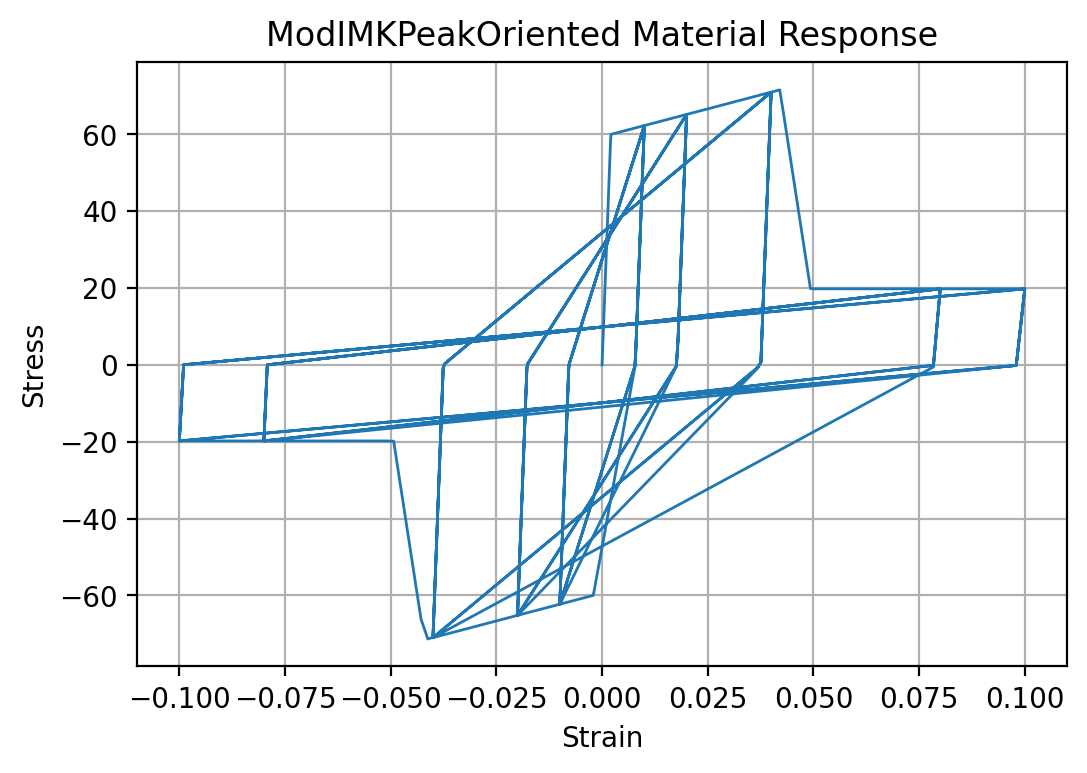

ModIMKPinching
[29000.0, 0.01, 0.01, 60.0, -60.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.04, 0.04, 0.01, 0.01, 0.33, 0.33, 0.225349487, 0.225349487, 0.0, 0.0]


Modified Ibarra-Medina-Krawinkler Model with Pinched Hysteretic Response


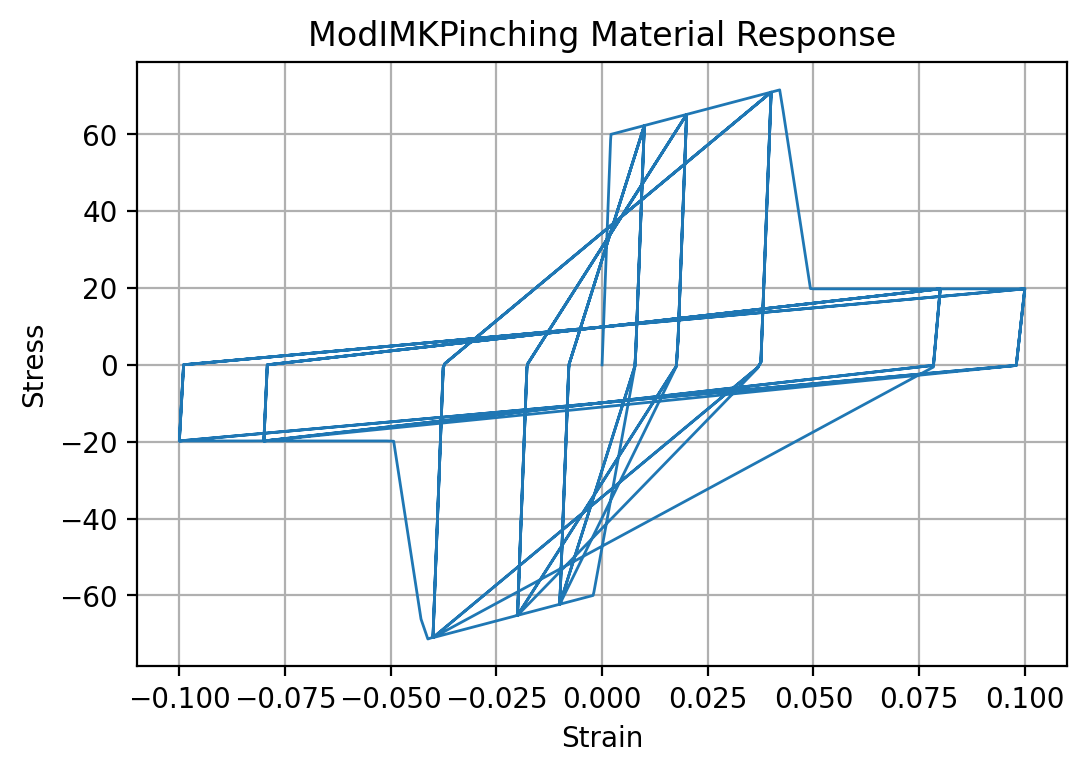

Pinching4
[60.0, 0.003, 78.0, 0.024, 61.2, 0.1, 61.0, 1.0, -60.0, -0.003, -78.0, -0.024, -61.2, -0.1, -61.0, -1.0, 0.5, 0.25, 0.05, 0.5, 0.25, 0.05, 1.0, 0.2, 0.3, 0.2, 0.9, 0.5, 0.5, 2.0, 2.0, 0.5, 1.0, 0.0, 1.0, 1.0, 0.9, 10.0, 'energy']


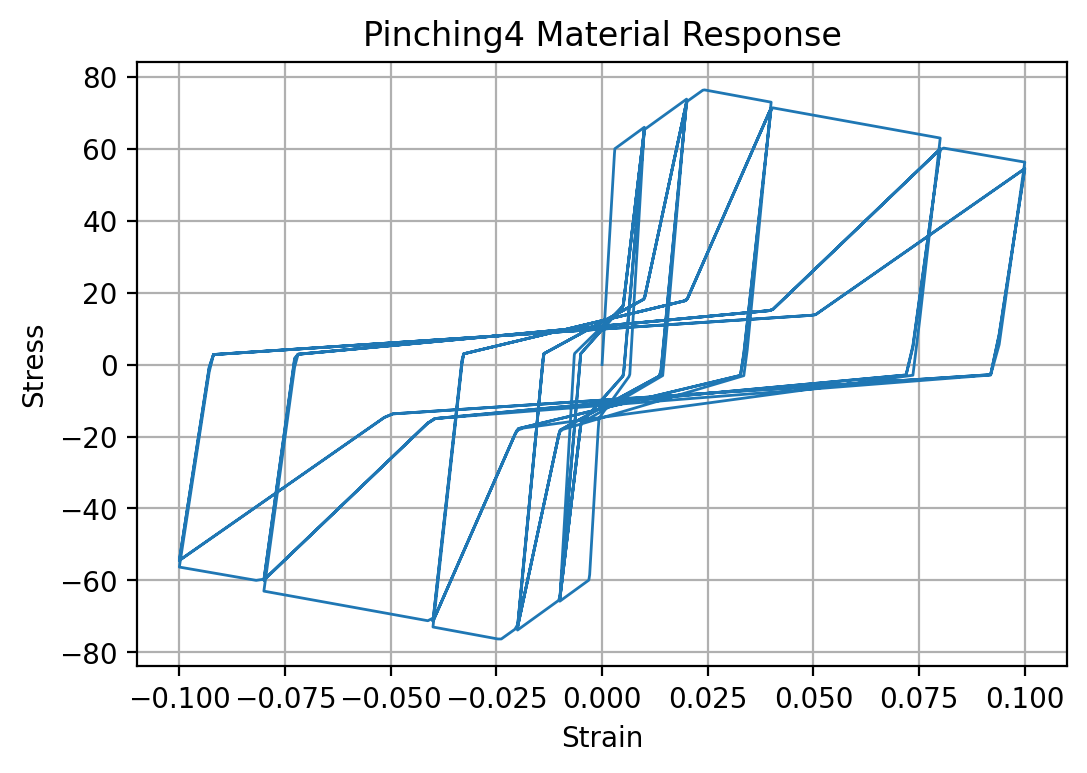

PySimple1
[1, 40.0, 0.01, 200.0, 0.0]


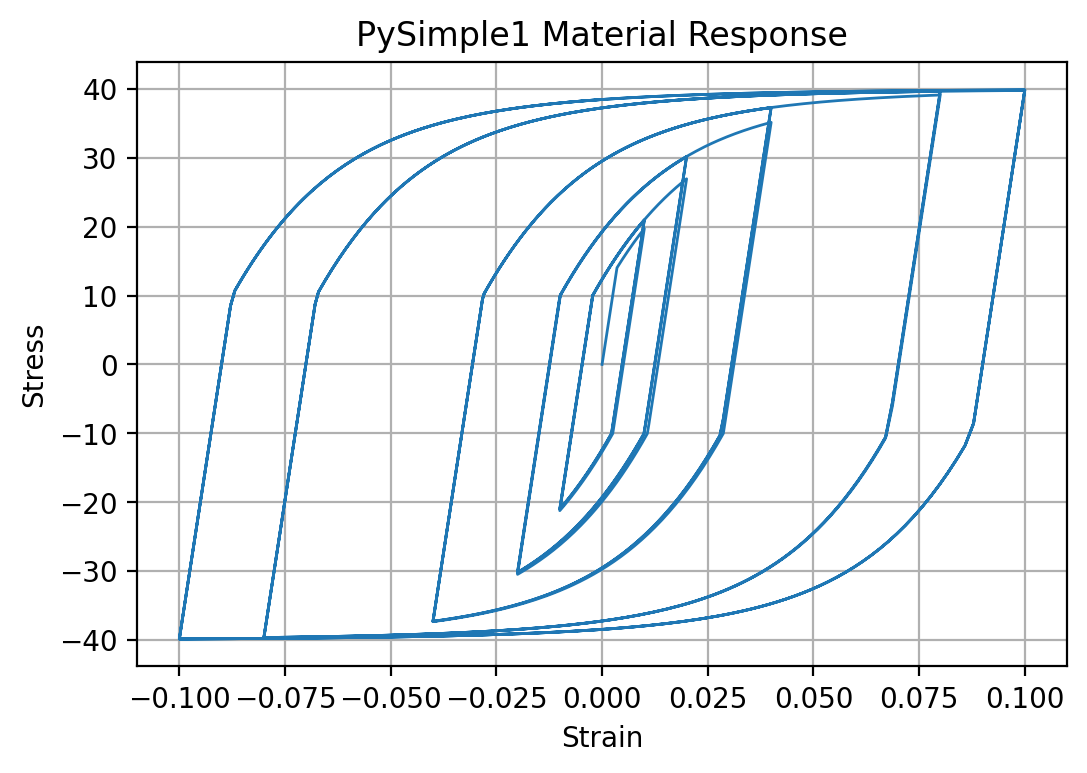

QzSimple1
[1, 40.0, 0.01, 0.0, 0.0]


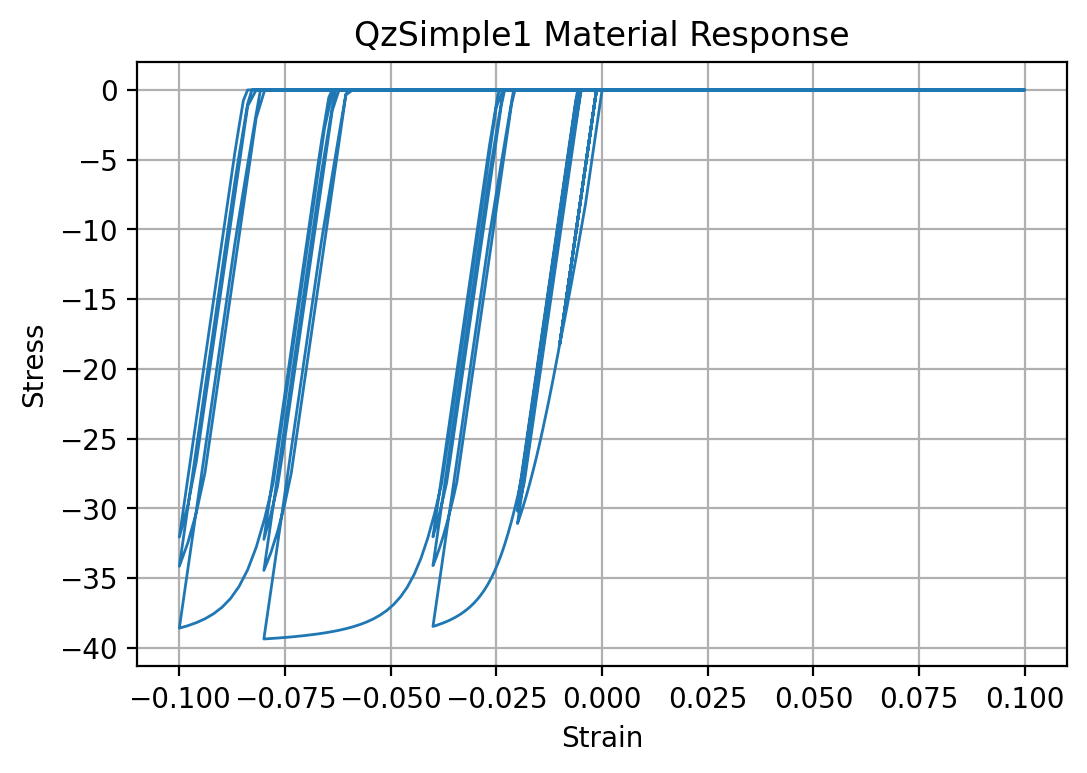

ReinforcingSteel
[60.0, 66.0, 29000.0, 2900.0, 0.008, 0.02, '-GABuck', 6, 1, 0.4, 0.5, '-DMBuck', 6, 1, '-CMFatigue', 0.26, 0.506, 0.389, '-IsoHard', 4.3, 0.01, '-MPCurveParams', 0.33, 18, 4]


-------------------------Bar failed---------------------------
0


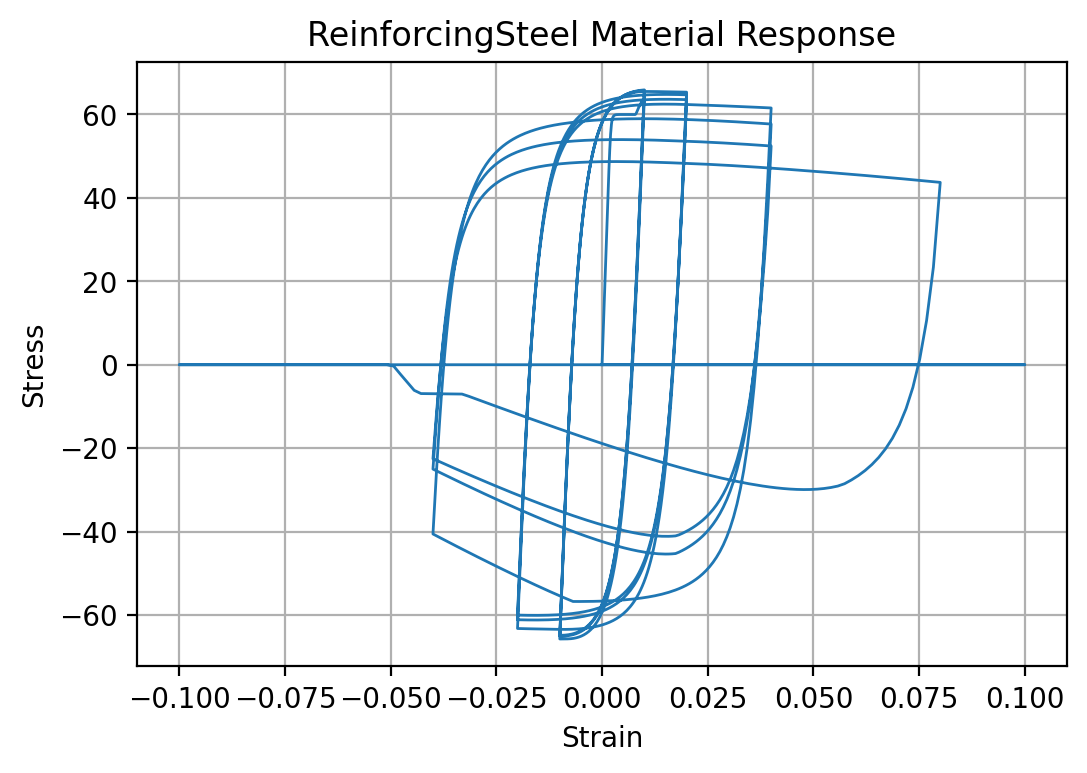

SAWS
[15.799848, 0.545094768764215, 1.04095, 159.83706, 0.1022018, -0.0324118361176701, 1.0, 0.0692552, 0.8, 1.1]


SAWSMaterial unaxial material - Written by Paxti Uriz, Exponent 2009


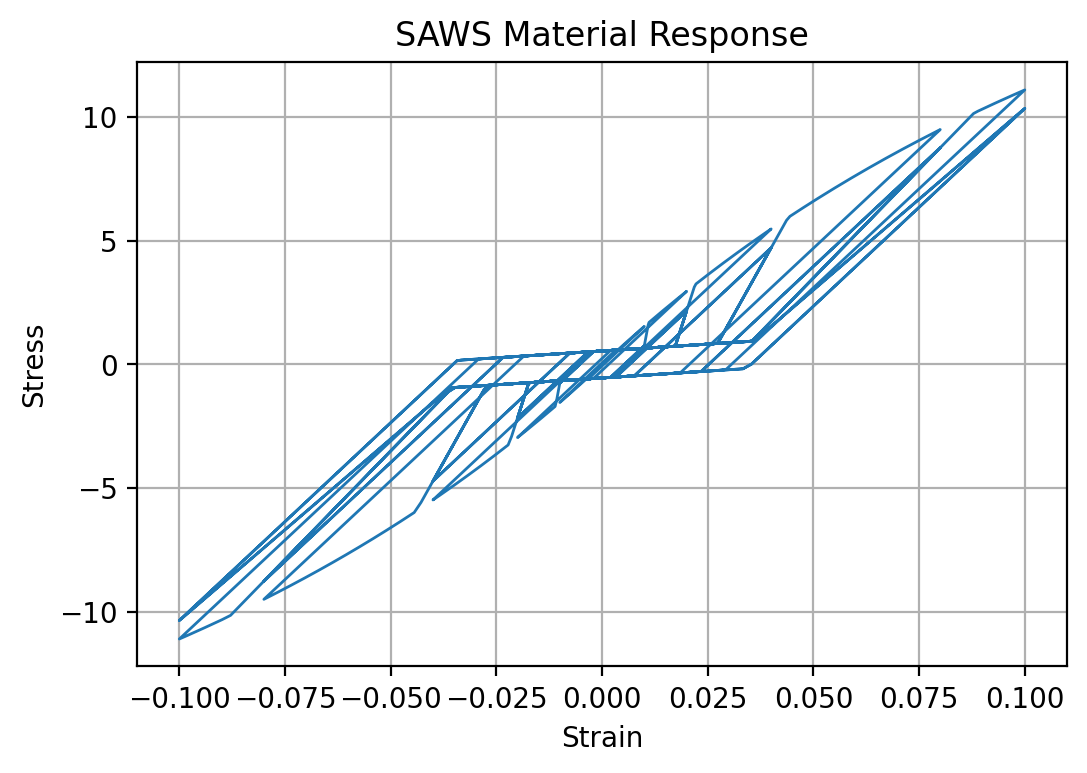

SelfCentering
[29000.0, 2900.0, 60.0, 0.1, 0, 0, 1]


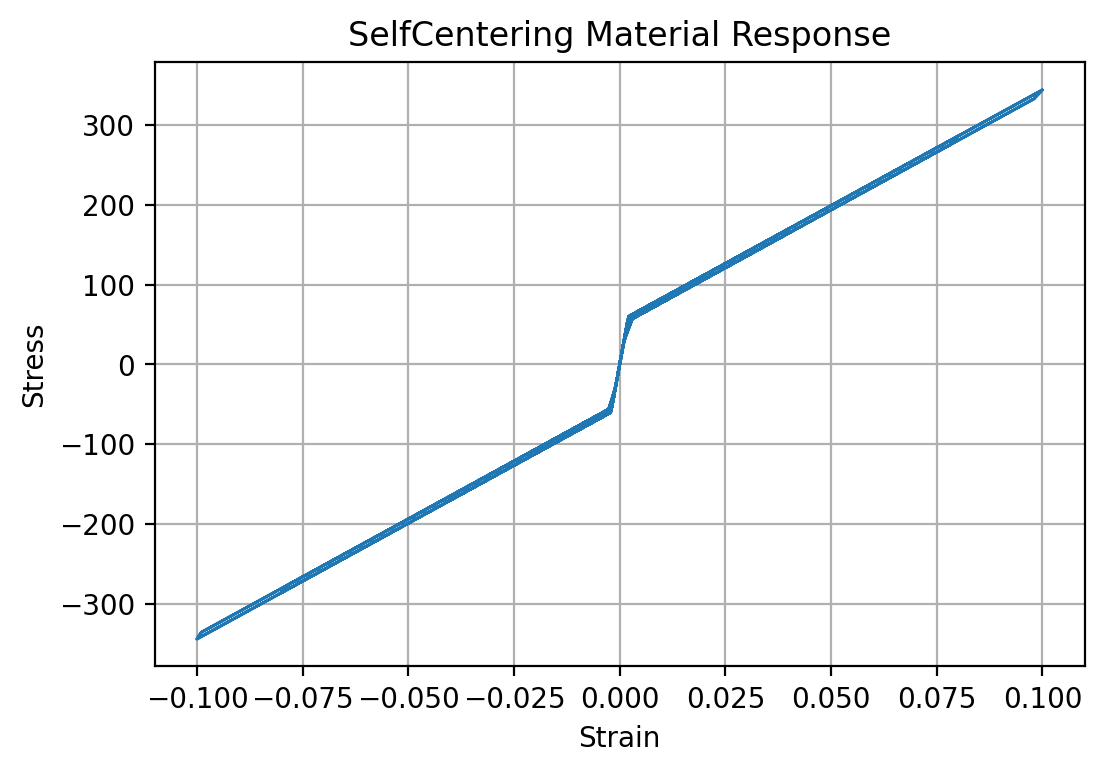

Steel01
[60.0, 29000.0, 0.05, 0.0, 1.0, 0.0, 1.0]


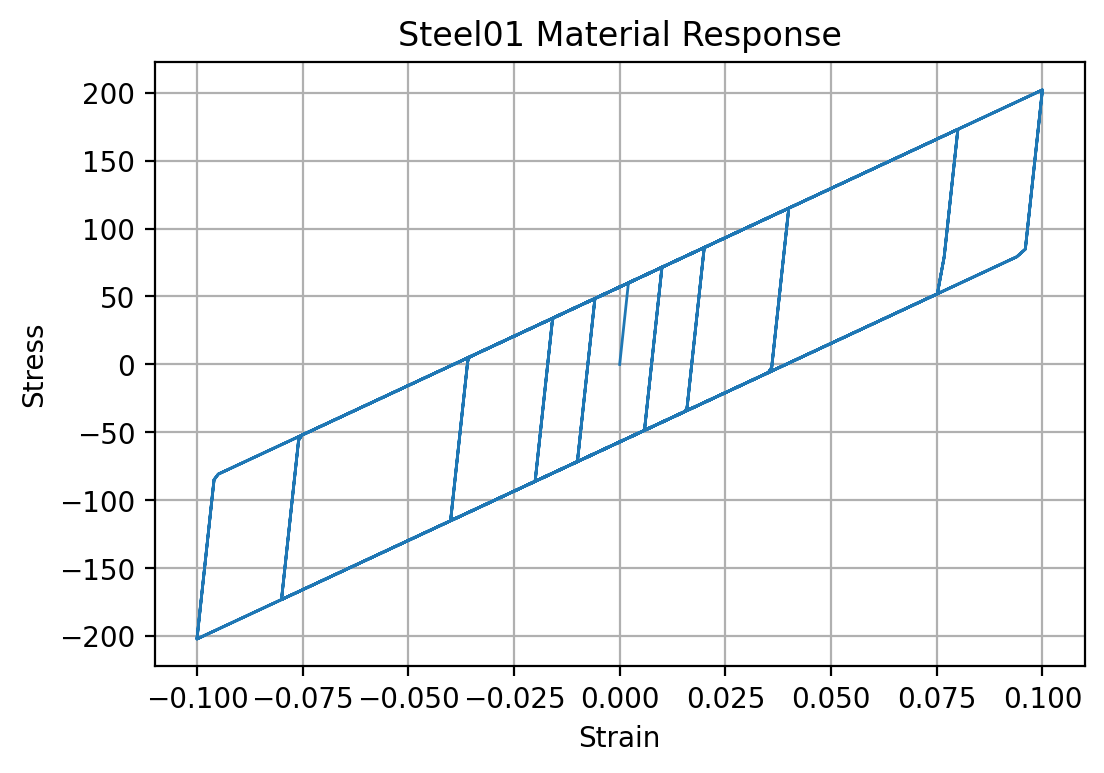

Steel02
[60.0, 29000.0, 0.05, 18.0, 0.925, 0.15, 0.0, 1.0, 0.0, 1.0, 0.0]


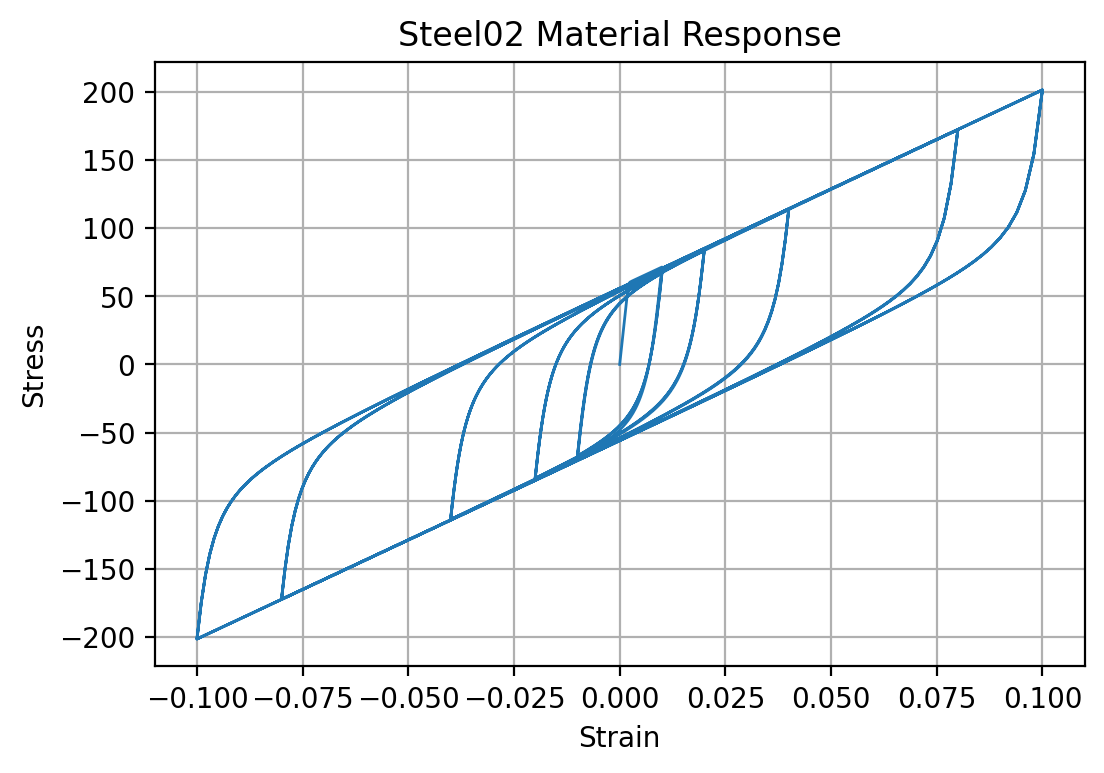

SteelMPF
[60.0, 40.0, 29000.0, 0.05, 0.01, 20.0, 0.925, 0.15, 0.0, 1.0, 0.0, 1.0]


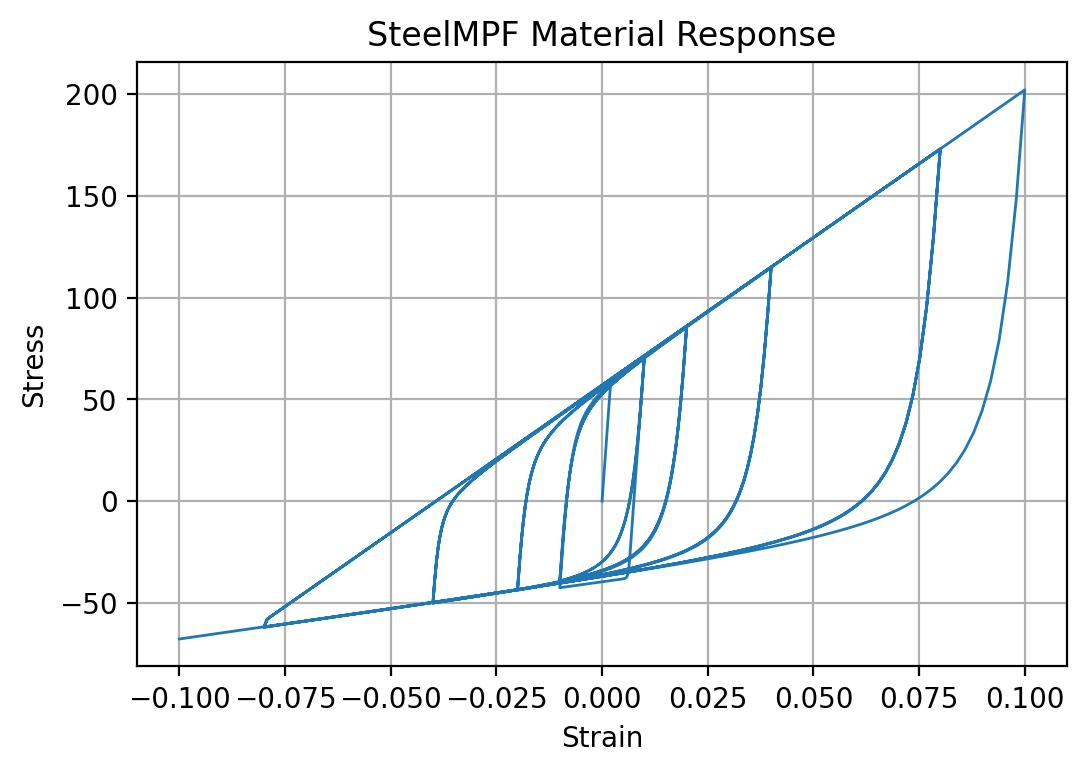

TzSimple1
[1, 40.0, 0.01, 0.0]


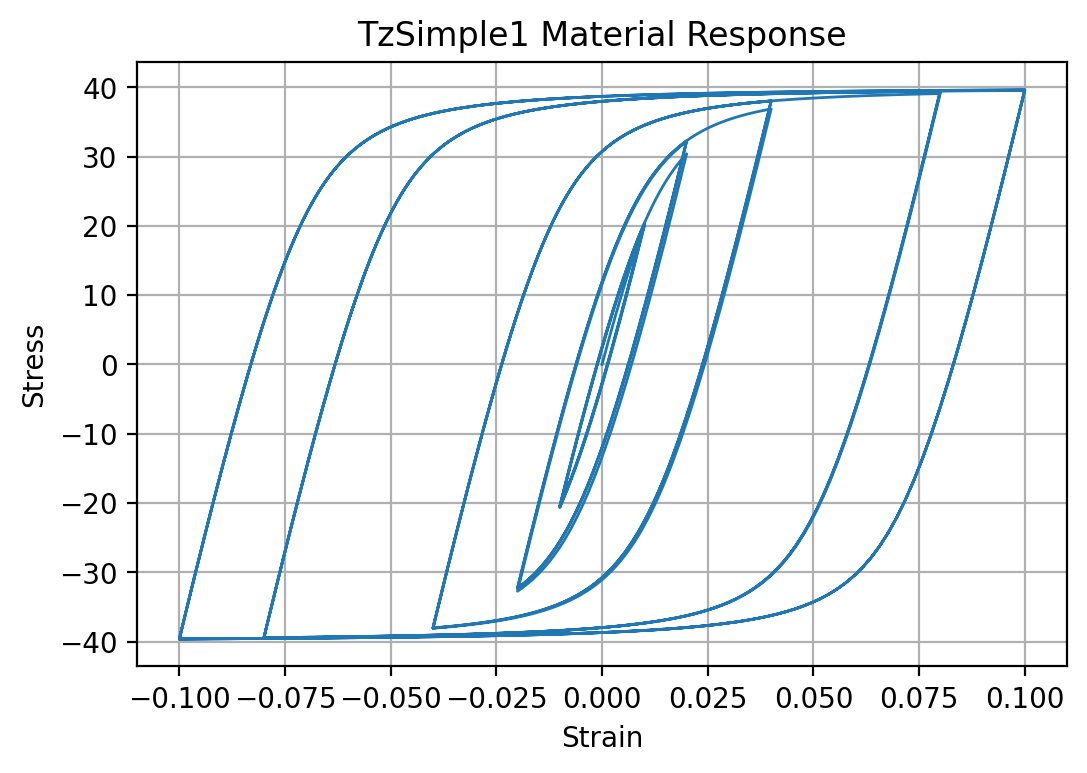

UVCuniaxial
[29000.0, 60.0, 122.63, 19.74, 143.49, 248.14, 2, 31638.0, 277.32, 1548.6, 9.04]


Using the UVCuniaxial material, see https://www.epfl.ch/labs/resslab/resslab-tools/


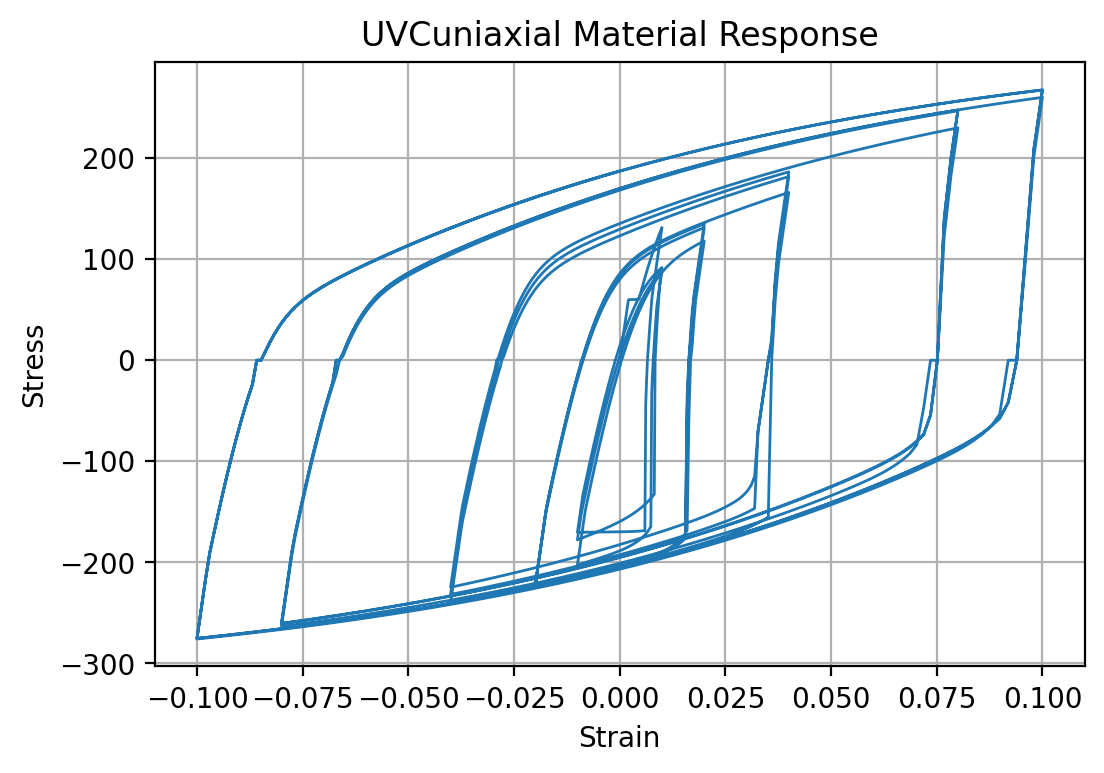

ViscousDamper
[29000.0, 200.0, 0.3, 0.0, 1, 1e-06, 1e-10, 15.0]


ViscousDamper Model by Sarven Akcelyan and Dimitrios G. Lignos, PhD, McGill University


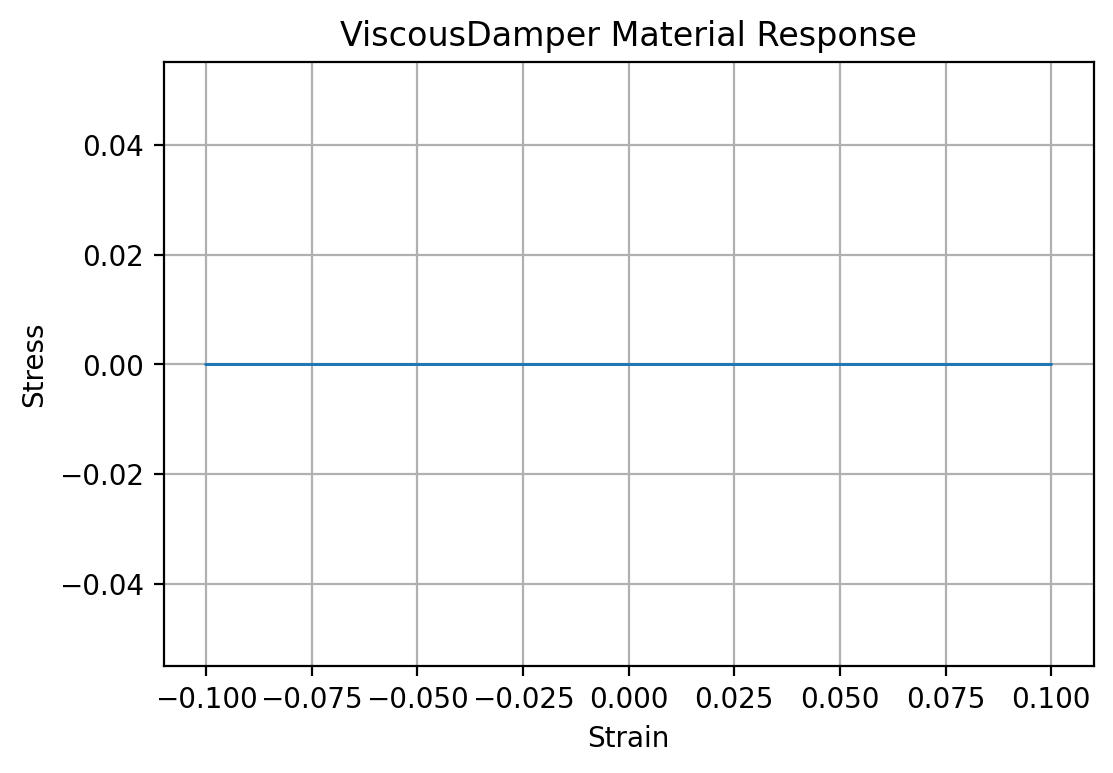

In [5]:
import openseespy.opensees as ops

AllStressStrain = {}

peaksArray=[1,2,4,8,10]
scaleFactor = 0.01
nSteps = 100
nCycles = 3
strain=defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles)

figSizeH = 6
figSizeV = 4
DPI = 200

thisCount = 0
for thisMaterial in OpenSeesMaterialDefaultValues.keys():
    print(thisMaterial)
    counter = thisCount + 1
    ops.wipe()
    materialTag = 99
    
    inputArray = OpenSeesMaterialDefaultValues[thisMaterial]
    
    print(inputArray)
    ops.uniaxialMaterial(thisMaterial,materialTag,*inputArray)

    ops.testUniaxialMaterial(materialTag)
    stress = []
    for eps in strain:
        ops.setStrain(eps)
        stress.append(ops.getStress())
        tangent = ops.getTangent() # Not used

    global AllStressStrain
    thisCount = len(list(AllStressStrain.keys()))
    thisKey = 'Run' + str(thisCount+1) + ' ' + thisMaterial
    AllStressStrain[thisKey] = {}
    AllStressStrain[thisKey]['strain'] = strain
    AllStressStrain[thisKey]['stress'] = stress
    
    figModel = plt.figure(f'Material Response {thisMaterial}',figsize=(figSizeH,figSizeV), dpi=DPI, facecolor='w', edgecolor='k' )
    axModel = figModel.add_subplot(1,1,1)    
    line, = axModel.plot(AllStressStrain[thisKey]['strain'], AllStressStrain[thisKey]['stress'],linewidth='1',label=thisMaterial,marker = '')
    axModel.grid()
    axModel.set_xlabel('Strain')
    axModel.set_ylabel('Stress')
    axModel.set_title(thisMaterial + ' Material Response')
            
    show_inline_matplotlib_plots()
